# Introduction to Interactive Data Visualization with Python
by [Christie Barron](https://github.com/christiebarron)




### Learning Objectives
- Use [pandas](https://pandas.pydata.org/) to wrangle data in Python.
- Use [`plotly express`](https://plotly.com/python/) to create interactive plots in Python
- Use [streamlit](https://streamlit.io/) to create a basic Streamlit Application

### Workshop Outline

- Introduction
  - Intro to Python, Jupyter Notebook, Google Colab
  - Brainstorm Superstore Data Visualization
- Data Wrangling with Pandas
  - Reading and wrangling data
  - EDA data visualization with Pandas
- Interactive Data Visualization with Plotly Express
  - Basic Chloropleth Map
  - Refactoring Code for Flexibility (Prepping for Widgets)
- Creating a Streamlit App
  - Adding Basic Widgets
- Try alternative plots (time-permitting)
   - Line plot
   - Bar plot
   - ...and more!

### Resources Used to Develop Workshop Materials
- This workshop is heavily inspired by a [Carpentries lesson on Interactive Data Visualization in Python](https://carpentries-incubator.github.io/python-interactive-data-visualizations/index.html)
- [Plotly documentation](https://plotly.com/python/plotly-express/)
- [Statistics and Data Visualization with Python by Rogel-Salazar (2023)](https://www.taylorfrancis.com/books/mono/10.1201/9781003160359/statistics-data-visualisation-python-jesus-rogel-salazar)
- [Dashboard Design by Burch & Schmid (2023)](https://www.routledge.com/Dashboard-Design/Burch-Schmid/p/book/9788770040044)
- [Interactive Web-Based Data Visualization with R, Plotly, and Shiny by Sievert (2019)](https://plotly-r.com/)

# Part 1: Introduction

## Introduction to Python, Jupyter Notebook, and Google Colab

### Python

- Python is a general purpose programming language that is useful for writing scripts to work effectively and reproducibly with data.
- It can be worked with interactively: as we're doing in a Jupyter Notebook today.
- It can also be used in a “Scripting” Mode: executing a series of “commands” saved in text file, usually with a .py extension after the name of your file.
  - We will use this when building a Streamlit application.


- [Python style guide](https://peps.python.org/pep-0008/)

### Jupyter Notebook
- Jupyter Notebook is a tool to work with Python interactively. It allows for literate programming by being able to combine text (markdown) and python code.

### Google Colab
- Colab is Google's implementation of Jupyter Notebook. Like all Jupyter Notebooks, a Colab Jupyter Notebook consists of two kinds of components:
  - Text cells, which contain explanations. You are currently reading a text cell.
  - Code cells, which contain Python code for you to run. Code cells have a light gray background.

- To run a code cell press Shift + Enter or place the cursor anywhere inside the [ ] area at the top left of a code cell. The area inside the [ ] will display an arrow. Click it to run a cell.
  - We can also run all cells by clicking Runtime -> Run all

- We will trick Google Colab to run Streamlit using several tools.

### Planning Superstore Dashboard Visualization

#### Activity 1 (3 mins)

You are an analyst for a Superstore. You're tasked with designing a dashboard including a Cloropleth map to provide an overview of sales, profits, revenue, etc. of the Superstore to the company executives at a high level.

The data you're provided include:
- Metrics:
  - Profit
  - Sales: real and forcasted (benchmark)
  - Quantity of orders
- Grouping Variables:
  - Location: Region, State, & City
  - Merchandise: Category & Subcategory
  - Order date: Year, Month, Day
  - Sale Information: Discounts
  - Shipping Information: Shipping Priority, Days to Ship

What sorts of Chloropleth plots would you like to show? Use the internet (e.g., Tableau Public) for some sources of inspiration.

- Exemplars:
  - https://public.tableau.com/app/profile/yuxin.tu/viz/ExecutiveDashboard_Superstore_YT/Dashboard1
  - https://public.tableau.com/app/profile/technical.product.marketing/viz/Superstore_24/Overview
  - https://public.tableau.com/app/profile/p.padham/viz/SuperstoreDashboard_16709573699130/SuperstoreDashboard


### Idioms that we will cover today:

- [Cloropleth plot](https://plotly.com/python/choropleth-maps/)
- Line plot (time-permitting)
- Bar plot (time-permitting)

# Part 2: Data Wrangling with Pandas



In [2]:
# import modules
 # load common data science and visualization modules to use them in our session
 # use common aliases to make function calls easier
 # if not already installed, can use `!pip install packageName` or `!conda install packageName` in Jupyter Notebook to install using pip or miniconda respectively.

import numpy as np                # working with numbers/arrays
import pandas as pd               # data manipulation library
import plotly.express as px       # interactive data visualization
import requests                   # downloading data from the web

#import seaborn as sns             # static data visualization
#import matplotlib.pyplot as plt   # static data visualization

In [3]:
# import dataset from Github url

# URL of the JSON file
json_url = "https://github.com/christiebarron/intro-data-vis/raw/main/data/raw/superstore_original.json"

# Read the JSON data from the URL
response = requests.get(json_url)
data = response.json()

# Create a pandas DataFrame from the JSON data
superstore = pd.DataFrame(data)

In [4]:
#ensure matplotlib plots displayed inline in Jupyter notebook
%matplotlib inline

In [5]:
# Check the dataframe
superstore.head(5)
#superstore.shape
#superstore.columns
#superstore.info()

# the column names are not ideal. We should fix that.

,category,city,country_region,customer_id,customer_name,order_date,order_id,order_profitable,postal_code,product_id,...,subcategory,days_to_ship_actual,days_to_ship_scheduled,discount,profit,quantity,sales,sales_forecast,order_year,order_month
0,Furniture,Henderson,United States,CG-12520,Claire Gute,1636329600000,CA-2021-152156,Profitable,42420.0,FUR-BO-10001798,...,Bookcases,3,3,0.00%,42,2,262,392,2021,Nov
1,Furniture,Henderson,United States,CG-12520,Claire Gute,1636329600000,CA-2021-152156,Profitable,42420.0,FUR-CH-10000454,...,Chairs,3,3,0.00%,220,3,732,1096,2021,Nov
2,Office Supplies,Los Angeles,United States,DV-13045,Darrin Van Huff,1623456000000,CA-2021-138688,Profitable,90036.0,OFF-LA-10000240,...,Labels,4,3,0.00%,7,2,15,22,2021,Jun
3,Furniture,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,1602374400000,US-2020-108966,Unprofitable,33311.0,FUR-TA-10000577,...,Tables,7,6,45.00%,-383,5,958,1434,2020,Oct
4,Office Supplies,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,1602374400000,US-2020-108966,Unprofitable,33311.0,OFF-ST-10000760,...,Storage,7,6,20.00%,3,2,22,33,2020,Oct


In [6]:
# Check data columns are read in correctly. Can see incorrectly thinks row_id and postal_code are a numbers.
superstore.dtypes

#convert that column from int64 to string
superstore["row_id"] = superstore["row_id"].astype(str)
superstore["postal_code"] = superstore["postal_code"].astype(str)

# re-check: is fixed now!
superstore.dtypes

category                  object
city                      object
country_region            object
customer_id               object
customer_name             object
order_date                 int64
order_id                  object
order_profitable          object
postal_code               object
product_id                object
product_name              object
region                    object
row_id                    object
segment                   object
ship_date                 object
ship_mode                 object
ship_status               object
state                     object
subcategory               object
days_to_ship_actual        int64
days_to_ship_scheduled     int64
discount                  object
profit                     int64
quantity                   int64
sales                      int64
sales_forecast             int64
order_year                 int64
order_month               object
dtype: object

In [7]:
# can see its incorrectly parsing month: out of order. Would need to convert to factor. Skipping for time.
superstore.order_month.unique()

array(['Nov', 'Jun', 'Oct', 'Apr', 'Dec', 'May', 'Aug', 'Jul', 'Sep',
       'Jan', 'Mar', 'Feb'], dtype=object)

In [8]:
# get summary statistics for variables coded as continuous
superstore.describe(percentiles = [.10, .25, .50, .75, .90])

# can see that profit, sales, and sales_forcast has some serious outliers.
 # SD is greater than mean, and max values are much larger than top 90%.
 # this will influence our graphs, and we'll want to come up with a reasonable solution.
 # log transformation seemed to work, but impedes interpretation.

,order_date,days_to_ship_actual,days_to_ship_scheduled,profit,quantity,sales,sales_forecast,order_year
count,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,1.619760e+12,3.958475,4.320692,28.651891,3.789574,229.873324,344.244847,2020.722233
std,3.631990e+10,1.747603,2.176059,234.255712,2.225110,623.248946,933.364519,1.123555
min,1.546474e+12,0.000000,0.000000,-6600.000000,1.000000,0.000000,1.000000,2019.000000
10%,1.567814e+12,2.000000,1.000000,-15.000000,2.000000,8.000000,12.000000,2019.000000
25%,1.590192e+12,3.000000,3.000000,2.000000,2.000000,17.000000,26.000000,2020.000000
50%,1.624666e+12,4.000000,6.000000,9.000000,3.000000,54.500000,82.000000,2021.000000
75%,1.652486e+12,5.000000,6.000000,29.000000,5.000000,210.000000,314.000000,2022.000000
90%,1.666397e+12,6.000000,6.000000,89.000000,7.000000,573.000000,857.700000,2022.000000
max,1.672358e+12,7.000000,6.000000,8400.000000,14.000000,22638.000000,33903.000000,2022.000000


In [9]:
# get counts of categorical variables
group_vars = ["category", "subcategory", "region", "segment", "state"]
for var in group_vars:
    print(f"---{var}---")
    print(superstore[var].value_counts())

---category---
category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64
---subcategory---
subcategory
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64
---region---
region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64
---segment---
segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64
---state---
state
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan      

### Static EDA Plots with Pandas

<Axes: title={'center': 'profit'}, xlabel='[region, category]'>

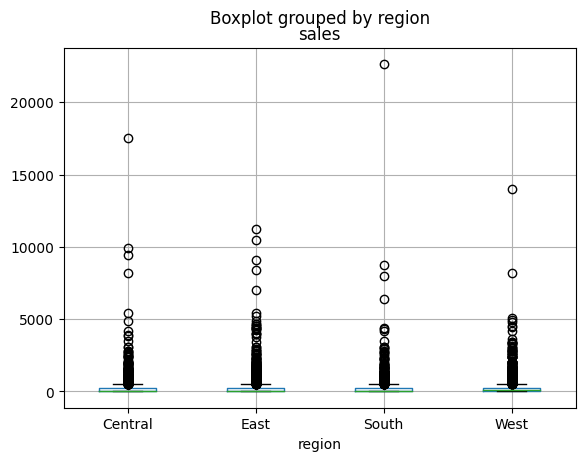

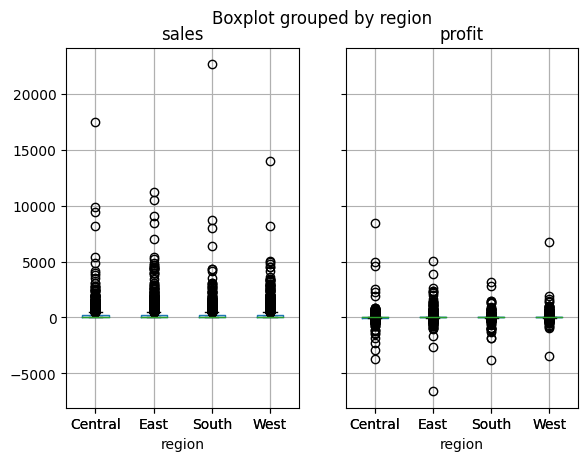

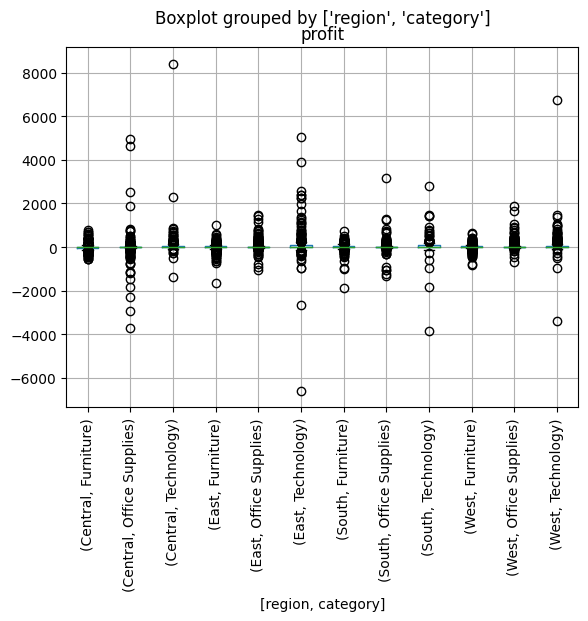

In [10]:
# create a boxplot of sales
superstore.boxplot(column = "sales", by = "region")

# add multiple variables to the boxplot
superstore.boxplot(column = ["sales", "profit"], by = "region")

# add multiple variables to the boxplot
superstore.boxplot(column = "profit", by = ["region", "category"], rot = 90)

array([[<Axes: title={'center': 'Central'}>,
        <Axes: title={'center': 'East'}>],
       [<Axes: title={'center': 'South'}>,
        <Axes: title={'center': 'West'}>]], dtype=object)

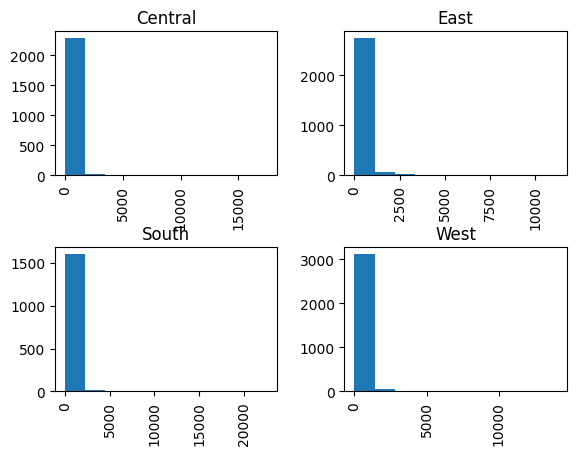

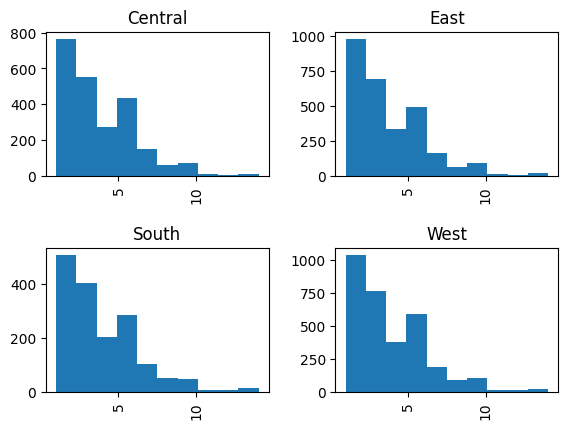

In [ ]:
# create histogram of sales
superstore.hist(column = "sales", by = "region")

# create histogram of quantity
superstore.hist(column = "quantity", by = "region")

### Data wrangling for the Cloropleth Plot

The plot needs U.S. state names in abbreviated form to be properly parsed. Fortunately, it isn't too difficult to convert from state names to state abbreviations with the `us` module.

In [ ]:
# install us module to make this easier
!pip install us

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.9 MB/s eta 0:00:00
  Created wheel for us: filename=us-3.1.1-py3-none-any.whl size=12547 sha256=73008098c9f7495b62608f125e676c6880238aa24e825a850e03149c6fa0e216
  Stored in directory: /root/.cache/pip/wheels/da/f9/64/9669135a7ce533faf78e3b32259c505f964f03b069be6844f8
Successfully built us
  Attempting uninstall: jellyfish
    Found existing installation: jellyfish 1.0.4
    Uninstalling jellyfish-1.0.4:
      Successfully uninstalled jellyfish-1.0.4


In [ ]:
# load us
import us

# Create a dictionary of state names to abbreviations
states = {state.name: state.abbr for state in us.states.STATES_AND_TERRITORIES}

# manually add DC cuz wasn't in there
states.update({'District of Columbia' : 'DC'})

# Replace the state names with their abbreviations
superstore['state_abb'] = superstore['state'].replace(states)


In [ ]:
superstore.columns

Index(['category', 'city', 'country_region', 'customer_id', 'customer_name',
       'order_date', 'order_id', 'order_profitable', 'postal_code',
       'product_id', 'product_name', 'region', 'row_id', 'segment',
       'ship_date', 'ship_mode', 'ship_status', 'state', 'subcategory',
       'days_to_ship_actual', 'days_to_ship_scheduled', 'discount', 'profit',
       'quantity', 'sales', 'sales_forecast', 'order_year', 'order_month',
       'state_abb'],
      dtype='object')

In [11]:
# optional workshop start point: skip data cleaning steps and just load clean data (superstore_clean.json) from github.
#json_url = "https://github.com/christiebarron/intro-data-vis/raw/main/data/clean/superstore_clean.json"
#superstore = pd.DataFrame(requests.get(json_url).json())

We now need to calculate aggregated summary statistics that we can add to the Cloropleth plot. This is easily do-able by using pandas' `groupby()` method.

In [12]:
# create an aggregated dataframe that takes the sum of the profit, sales, and quantity columns grouped by state and abbreviated state.
 # this takes the sum over the whole dataset (i.e., for all years, all categories, etc.)
temp_df = superstore.groupby(["state", "state_abb"])[["profit", "sales", "quantity"]].sum().reset_index()
temp_df.sample(10)


,state,state_abb,profit,sales,quantity
20,Michigan,MI,24458,76281,946
30,New York,NY,74020,310914,4224
29,New Mexico,NM,1153,4779,151
21,Minnesota,MN,10828,29865,331
35,Oregon,OR,-1187,17431,499
34,Oklahoma,OK,4852,19686,247
9,Georgia,GA,16247,49103,705
46,West Virginia,WV,185,1209,18
14,Kansas,KS,836,2916,74
39,South Dakota,SD,395,1317,42


With the aggregated dataset completed, we're ready to create a Cloropleth plot.

# Part 3: Interactive Data Visualization in Python

## Plotly & Plotly Express
Plotly is one great tool for creating interactive plots. Plotly's JavaScript library `Plotly.js` is open-source, and powers `Plotly.py` for Python. We will use the `plotly.express` module, which facilitates creating figures in a simple manner.  

Potential alternatives to Plotly include [Bokeh](https://bokeh.pydata.org/en/latest/) and [Altair](https://altair-viz.github.io/).

### Interactive Functions we can Explore:
- **Filters**:
  - **Slider**: a filter for continuous variables.
  - **Clickable parameters**: checkboxes or drop-down menu to filter categorical variables.
- **Hover**: providing additional information about a datapoint when the mouse hovers over it.
- **Zoom**: Zooming in and out of a plot to focus on specific areas of a plot.



## Plotly Express Cloropleth Graph

Recall the `temp_df` dataframe is already ready to be plotted.

In [ ]:
temp_df.head(10)

,state,state_abb,profit,sales,quantity
0,Alabama,AL,5785,19511,256
1,Arizona,AZ,-3432,35283,862
2,Arkansas,AR,4006,11678,240
3,California,CA,76368,457731,7667
4,Colorado,CO,-6527,32110,693
5,Connecticut,CT,3510,13386,281
6,Delaware,DE,9979,27453,367
7,District of Columbia,DC,1059,2866,40
8,Florida,FL,-3412,89479,1379
9,Georgia,GA,16247,49103,705


### Basics of Creating a Plotly Express Clororpleth Map

In [13]:
# basic GeoJSON choropleth we'll work with
fig = px.choropleth(data_frame = temp_df,
                    locationmode="USA-states",
                    scope="usa")
fig.show()

In [ ]:
# link the GeoJSON to our data
fig = px.choropleth(        # Use plotly express's choropleth function
    data_frame = temp_df,   # The DataFrame containing the data to be visualized
    locations="state_abb",  # Column in DataFrame that will be used to set the locations on the map
    locationmode="USA-states", # Defines the set of locations used to match entries in `locations` to regions on the map
    color="profit",         # Column in DataFrame that will be used to color the regions on the map
    hover_name= "state",    # Column in DataFrame that will be displayed when hovering over regions on the map
    scope="usa"             # Defines the scope of the map (in this case, it's set to display the USA)
)

# add title
fig.update_layout(title="Profit by State")

# show the figure
fig.show()                  # Displays the generated map

In [ ]:
# check possible diverging colour palettes in plotly express
px.colors.diverging.swatches_continuous()

In [ ]:
# Make the visualization colours nicer
fig = px.choropleth(temp_df,
                    locations="state_abb",
                    locationmode="USA-states",
                    color="profit",
                    hover_name= "state",
                    color_continuous_scale=px.colors.sequential.RdBu,
                    color_continuous_midpoint=0, # set colour midpoint to zero
                    scope="usa")
fig.show()

In [ ]:
# Add more helpful popup text to the plot by customizing the hover text: https://plotly.com/python/hover-text-and-formatting/

# rename columns in dataframe to be uppercase so more presentable
temp_df = temp_df.rename(columns={
    "profit": "Profit",
    "sales": "Sales",
    "quantity": "Quantity"
})

# dictionary of columns to include in hover data, excluding "state_abb"
hover_data ={'state_abb':False,
             'Profit' : True,
             'Sales' : True,
             'Quantity': True}

# Plot the result
fig = px.choropleth(temp_df,
                    locations="state_abb",
                    locationmode="USA-states",
                    color="Profit",
                    hover_name= "state",
                    color_continuous_scale=px.colors.sequential.RdBu,
                    color_continuous_midpoint=0, # set colour midpoint to zero
                    scope="usa",
                    hover_data = hover_data)
fig.show()

### Drilling Down into Data with Filters

The previous plot was for all years and all categories. Let's now drill down into the data by grouping by year and category to promote greater insights.

In [ ]:
# create aggregated data grouped by year and category in addition to state now
temp_df = superstore.groupby(["order_year", "category", "state", "state_abb"])[["profit", "sales", "quantity"]].sum().reset_index()
temp_df.sample(10)

,order_year,category,state,state_abb,profit,sales,quantity
75,2019,Office Supplies,Rhode Island,RI,139,304,16
86,2019,Technology,Arkansas,AR,533,1922,18
69,2019,Office Supplies,New York,NY,3951,14563,482
52,2019,Office Supplies,Iowa,IA,3,6,3
226,2020,Technology,Louisiana,LA,52,161,12
376,2022,Furniture,Arizona,AZ,-1111,4505,54
408,2022,Furniture,South Carolina,SC,59,445,7
360,2021,Technology,New York,NY,6865,20454,148
265,2021,Furniture,Kansas,KS,24,71,6
495,2022,Technology,Oregon,OR,160,1037,17


In [ ]:
# query the data to just keep relevant rows
filter_df = temp_df.query("order_year == 2022 & category == 'Furniture'")
filter_df.sample(10)

,order_year,category,state,state_abb,profit,sales,quantity
380,2022,Furniture,Delaware,DE,68,876,11
385,2022,Furniture,Illinois,IL,-2943,8762,133
386,2022,Furniture,Indiana,IN,958,4241,32
399,2022,Furniture,New Jersey,NJ,423,3500,36
395,2022,Furniture,Missouri,MO,131,474,11
400,2022,Furniture,New Mexico,NM,132,587,12
381,2022,Furniture,District of Columbia,DC,16,38,2
382,2022,Furniture,Florida,FL,-1338,10367,104
383,2022,Furniture,Georgia,GA,838,3703,39
392,2022,Furniture,Michigan,MI,1972,7606,62


In [ ]:
# plot the filtered data

# rename columns in dataframe to be uppercase so more presentable
filter_df = filter_df.rename(columns={
    "profit": "Profit",
    "sales": "Sales",
    "quantity": "Quantity",
    "category" : "Category"
})

# dictionary of columns to include in hover data, excluding "state_abb"
hover_data ={'state_abb':False,
             'Category' : True,
             'Profit' : True,
             'Sales' : True,
             'Quantity': True}

# Plot the result
fig = px.choropleth(data_frame = filter_df,
                    locations="state_abb",
                    locationmode="USA-states",
                    color="Profit",
                    hover_name= "state",
                    color_continuous_scale=px.colors.sequential.RdBu,
                    color_continuous_midpoint=0, # set colour midpoint to zero
                    scope="usa",
                    hover_data = hover_data)
# add title
fig.update_layout(title="Profit in Furniture for 2022")

# show the figure
fig.show()

### Activity 3: Select your own filter criteria (10 mins)

Drill down to the data using other filter criteria and create a Choropleth map of them. You can use the same filter variables and just different categories (e.g., year == 2021 and category == 'Technology') or you can use different variables entirely (e.g., subcategory == 'Binders')

## Create a Basic Streamlit Web Application in Google Colab
- There are various interactive dashboarding tools with Python that require minimum front-end experience. Two common options are [Streamlit](https://streamlit.io/) and [Plotly Dash](https://plotly.com/examples/)
  - We'll use Streamlit here given its ease of use. See [here](https://docs.kanaries.net/topics/Streamlit/streamlit-vs-dash) for a comparison.
- Its best practice (and easier) to create app using a `.py` script, not jupyter notebook. But we're doing it here just as a showcase.


- We can now publish the plot to a basic Streamlit App. This is tedious in Google Colab, but we'll use a workaround.

In [14]:
# install streamlit
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00


In [15]:
#create app.py script

%%writefile app.py

# Carpentries example with streamlit

import streamlit as st
import pandas as pd
import plotly.express as px
import requests

# set up the app with wide view preset and a title
st.set_page_config(layout="wide")
st.title("Interact with Superstore Data")

# import cleaned data from github (note this wasn't shown how to do)
json_url = "https://github.com/christiebarron/intro-data-vis/raw/main/data/clean/superstore_state_year_category.json"
response = requests.get(json_url)
data = response.json()
temp_df = pd.DataFrame(data)

# run query on the dataframe, saving as separate value
filter_df = temp_df.query("order_year == 2022 & category=='Furniture'")

# rename columns in dataframe to be uppercase so more presentable
filter_df = filter_df.rename(columns={
    "profit": "Profit",
    "sales": "Sales",
    "quantity": "Quantity",
    "category" : "Category"
})

# dictionary of columns to include in hover data, excluding "state_abb"
hover_data ={'state_abb':False,
             'Category' : True,
             'Profit' : True,
             'Sales' : True,
             'Quantity': True}

# Plot the result
fig = px.choropleth(data_frame = filter_df,
                    locations="state_abb",
                    locationmode="USA-states",
                    color="Profit",
                    hover_name= "state",
                    color_continuous_scale=px.colors.sequential.RdBu,
                    color_continuous_midpoint=0, # set colour midpoint to zero
                    scope="usa",
                    hover_data = hover_data)
fig.show()

# display the plot
st.plotly_chart(fig, use_container_width=True)

Writing app.py


In [16]:
# install localtunnel
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 6.008s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [17]:
# run streamlit, and copy number as password
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.29.169.11


In [18]:
# Expose the port 8501
!npx localtunnel --port 8501

npx: installed 22 in 3.806s
your url is: https://bumpy-ties-dig.loca.lt
^C


## Add Dynamic Filter Variables to Interactive Plot

We can expand the above Streamlit web application by adding the ability to drill down into the data.

We'll start by focusing on dynamic filters in Python.

In [ ]:
# same data aggregation calculation as before, but using dynamic variables
group_vars = ["order_year", "category", "state", "state_abb"]
metric_vars = ["profit", "sales", "quantity"]

# create aggregated data grouped by year and category in addition to state now
temp_df = superstore.groupby(group_vars)[metric_vars].sum().reset_index()
temp_df

,order_year,category,state,state_abb,profit,sales,quantity
0,2019,Furniture,Alabama,AL,554,3591,30
1,2019,Furniture,Arizona,AZ,-450,1382,34
2,2019,Furniture,Arkansas,AR,566,2382,32
3,2019,Furniture,California,CA,1883,32960,352
4,2019,Furniture,Colorado,CO,-111,1721,26
...,...,...,...,...,...,...,...
502,2022,Technology,Utah,UT,53,199,13
503,2022,Technology,Vermont,VT,68,205,7
504,2022,Technology,Virginia,VA,278,1058,18
505,2022,Technology,Washington,WA,10261,29962,162


In [ ]:
# add dynamic filter variables. Same as before, but now dynamic
filter_year = 2022 # can be any year in the dataset
filter_category = "Furniture" #can be any category in the dataset

# use a Python Fstring to write dynamic query to the data
filter_df = temp_df.query(f"order_year == {filter_year} & category == '{filter_category}'")
filter_df



,order_year,category,state,state_abb,profit,sales,quantity
375,2022,Furniture,Alabama,AL,38,152,4
376,2022,Furniture,Arizona,AZ,-1111,4505,54
377,2022,Furniture,California,CA,2487,40672,524
378,2022,Furniture,Colorado,CO,-867,2776,59
379,2022,Furniture,Connecticut,CT,493,1770,19
380,2022,Furniture,Delaware,DE,68,876,11
381,2022,Furniture,District of Columbia,DC,16,38,2
382,2022,Furniture,Florida,FL,-1338,10367,104
383,2022,Furniture,Georgia,GA,838,3703,39
384,2022,Furniture,Idaho,ID,18,77,6


In [ ]:
# add dynamic metric of interest and dynamic middle point
metric = "profit"

if metric == "profit":
    midpoint = 0
else:
    midpoint = np.mean(filter_df[metric])

midpoint

0

In [ ]:
# plot the dynamic data
# rename columns in dataframe to be uppercase so more presentable
filter_df = filter_df.rename(columns={
    "profit": "Profit",
    "sales": "Sales",
    "quantity": "Quantity",
    "category" : "Category"
})

# dictionary of columns to include in hover data, excluding "state_abb"
hover_data ={'state_abb':False,
             'Category' : True,
             'Profit' : True,
             'Sales' : True,
             'Quantity': True}

# Plot the result
fig = px.choropleth(data_frame = filter_df,
                    locations="state_abb",
                    locationmode="USA-states",
                    color=metric.capitalize(),
                    hover_name= "state",
                    color_continuous_scale=px.colors.sequential.RdBu,
                    color_continuous_midpoint=midpoint, # set colour midpoint to zero
                    scope="usa",
                    hover_data = hover_data)
fig.update_layout(title=f"{metric.capitalize()} in {filter_category} for {filter_year}")
fig.show()

### Build a Dynamic Streamlit App in Google Colab


In [ ]:
# uncomment and install streamlit if haven't already done so
# !pip install -q streamlit

In [ ]:
#create app.py script

%%writefile app.py

# Carpentries example with streamlit

import streamlit as st
import numpy as np
import pandas as pd
import plotly.express as px
import requests

# set up the app with wide view preset and a title
st.set_page_config(layout="wide")
st.title("Interact with Superstore Data")

# import our data as a pandas dataframe
json_url = "https://github.com/christiebarron/intro-data-vis/raw/main/data/clean/superstore_state_year_category.json"
response = requests.get(json_url)
data = response.json()
temp_df = pd.DataFrame(data)

# get a list of all possible metrics, categories, years, and segments. Used for the widgets.
metric_list = ['profit', 'sales', 'quantity']
category_list = temp_df["category"].unique()
year_list = temp_df["order_year"].unique()

# map the actual data values to more readable strings
label_dict = ({"sales": "Sales", "profit" : "Profit", "quantity" : "Quantity"})

# function to be used in widget argument format_func that maps metric values to readable labels, using dict above
def format_labels(original_label_value):
    return label_dict[original_label_value]

# put all widgets in sidebar and have a subtitle
with st.sidebar:
    st.subheader("Configure the plot")
    # widget to choose which category to display
    filter_category = st.selectbox(label = "Choose a category", options = category_list)
    # widget to choose which metric to display
    metric = st.selectbox(label = "Choose a metric", options = metric_list, format_func=format_labels)
    # widget to choose which year to display
    filter_year = st.selectbox(label = "Choose a year", options = year_list)

# use selected values from widgets to filter dataset down to only the rows we need
filter_df = temp_df.query(f"order_year == {filter_year} & category == '{filter_category}'")

# use selected metric of midget to select dynamic midpoint
if metric == "profit":
    midpoint = 0
else:
    midpoint = np.mean(filter_df[metric])

# rename columns in dataframe to be uppercase so more presentable
filter_df = filter_df.rename(columns={
    "profit": "Profit",
    "sales": "Sales",
    "quantity": "Quantity",
    "category" : "Category"
})

# dictionary of columns to include in hover data, excluding "state_abb"
hover_data ={'state_abb':False,
             'Category' : True,
             'Profit' : True,
             'Sales' : True,
             'Quantity': True}

# Plot the result
fig = px.choropleth(data_frame = filter_df,
                    locations="state_abb",
                    locationmode="USA-states",
                    color=metric.capitalize(),
                    hover_name= "state",
                    color_continuous_scale=px.colors.sequential.RdBu,
                    color_continuous_midpoint=midpoint, # set colour midpoint to zero
                    scope="usa",
                    hover_data = hover_data)
fig.update_layout(title=f"{metric.capitalize()} in {filter_category} for {filter_year}")
fig.show()

# display the plot
st.plotly_chart(fig, use_container_width=True)


Overwriting app.py


In [ ]:
# uncomment and install localtunnel if not already installed
# !npm install localtunnel

In [ ]:
# run streamlit
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.125.141.87


In [ ]:
# Expose the port 8501
!npx localtunnel --port 8501

npx: installed 22 in 1.86s
your url is: https://vast-months-guess.loca.lt
^C


### Activity 4:

# Bonus Content (Time-Permitting)

#### Plotly Line Graph

Line graph can be useful to showcase trends of sales, profits, orders, etc. over time

- See the [Carpentries lesson](https://carpentries-incubator.github.io/python-interactive-data-visualizations/index.html) for another example of creating a line plot.

In [ ]:
# assuming that data has already been read in.
superstore_backup = superstore.copy()
superstore_backup['order_count'] = superstore_backup['quantity']

In [ ]:
# check months to turn into ordered categorical factor.
superstore_backup['order_month'].unique()

array(['Nov', 'Jun', 'Oct', 'Apr', 'Dec', 'May', 'Aug', 'Jul', 'Sep',
       'Jan', 'Mar', 'Feb'], dtype=object)

In [ ]:
# treat month as ordered categorical (factor)
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Oct", "Nov", "Dec"], ordered=True)
superstore_backup['order_month'] = superstore_backup["order_month"].astype(cat_type)
superstore_backup['order_month'].unique()

['Nov', 'Jun', 'Oct', 'Apr', 'Dec', ..., 'Jul', NaN, 'Jan', 'Mar', 'Feb']
Length: 12
Categories (11, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Aug' < 'Oct' < 'Nov' < 'Dec']

In [ ]:
# Data wrangling to calculate the totals to graph
fig_df = (superstore_backup
                      .groupby(["order_month", "category"])[["profit", "sales", "order_count"]].sum().reset_index()
                      )
fig_df.sample(10)

,order_month,category,profit,sales,order_count
10,Apr,Office Supplies,4748,49441,1519
13,May,Office Supplies,9024,43026,1708
25,Oct,Office Supplies,10927,55205,1804
15,Jun,Furniture,978,52999,538
2,Jan,Technology,4835,30123,271
4,Feb,Office Supplies,4273,20641,658
14,May,Technology,11075,63644,495
11,Apr,Technology,5379,47635,419
19,Jul,Office Supplies,2322,43010,1558
16,Jun,Office Supplies,11081,51424,1674


In [ ]:
# Create a basic line graph with different colours for different categories

# Data wrangling to calculate the totals to graph
fig_df = (superstore_backup
                      .groupby(["order_month", "category"])[["profit", "sales", "order_count"]].sum().reset_index()
                      )
# sales line graph
fig = px.line(
    #dataframe to use
    data_frame = fig_df,
    # specify aesthetic mappings
    x = "order_month", y = "sales", color = "category",markers=True,
    # add title
    title = "Sales by Month (2019-2022)",
    # relabel x-axis, y-axis, legend
    labels={"sales": "Sales", "order_month" : "Order Month", "category" : "Category"},
    # specify colour palette

    )
fig.show()

# profit line graph



In [ ]:
# line graph adding year as interactive component

# sales line graph
fig = px.line(
    # Calculate the totals to graph
    (superstore_backup
                      .groupby(["order_year", "order_month", "category"])[["profit", "sales", "order_count"]].sum().reset_index()),
    # specify aesthetic mappings
              x = "order_month", y = "sales", color = "category", markers=True,
    # add title
              title = "Sales by Month",
    # relabel x-axis, y-axis, legend
              labels={"sales": "Sales", "order_month" : "Order Month", "category" : "Category"},

    # add interactive slider
    #animation_group= "order_year",
    animation_frame= "order_year"
    )
fig.show()

# profit line graph

In [ ]:
# sales line graph
fig = px.line(
    # Calculate the totals to graph
    (superstore_backup
                      .groupby(["order_year", "order_month", "category", "region"])[["profit", "sales", "order_count"]].sum().reset_index()),
    # specify aesthetic mappings
              x = "order_month", y = "sales", color = "category", markers=True,
    # add title
              title = "Sales by Month",
    # relabel x-axis, y-axis, legend
              labels={"sales": "Sales", "order_month" : "Order Month", "category" : "Category", "region": "Region"},

    #add interactive components
    animation_group= "order_year",
    animation_frame= "order_year",

    #add region as facet
    facet_col= "region"

    )
fig.show()

In [ ]:
fig_df = (superstore_backup
 .groupby(["order_year", "order_month", "category"])[["profit", "sales", "order_count"]].sum().reset_index()
 .melt(id_vars=["order_year", "order_month", "category"], var_name="metric", value_name="value")
 .query("metric == 'profit' or metric == 'sales'")
)

# sales line graph
fig = px.line(fig_df,
              x="order_month", y="value", color="category",
              animation_frame="order_year",
              animation_group= "metric",
              title="Sales and Profit by Month")
#fig.update_yaxes(matches=None)
fig.show()

In [ ]:
# now add dynamic year
filter_year = 2019

fig = px.line(
    # Calculate the totals to graph
    (superstore_backup.query(f'order_year == {filter_year}')
                      .groupby(["order_month", "category"])[["profit", "sales", "order_count"]].sum().reset_index()),
    # specify aesthetic mappings
              x = "order_month", y = "sales", color = "category",
    # add title
              title = f"Sales by Month for {filter_year}",
    # relabel x-axis, y-axis, legend
              labels={"sales": "Sales", "order_month" : "Order Month", "category" : "Category"})
fig.show()

## Create a Streamlit Web Application with a Line Plot

In [21]:
from pandas.api.types import CategoricalDtype
# import our data as a pandas dataframe
json_url = "https://github.com/christiebarron/intro-data-vis/raw/main/data/raw/superstore_original.json"
response = requests.get(json_url)
data = response.json()
df = pd.DataFrame(data)

# ensure month read as ordered categorical
cat_type = CategoricalDtype(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Oct", "Nov", "Dec"], ordered=True)
df['order_month'] = df["order_month"].astype(cat_type)

fig_df = (df
          .groupby(["order_year", "order_month", "category", "segment"])[["profit", "sales", "quantity"]].sum().reset_index()
.melt(id_vars=["order_year", "order_month", "category", "segment"], var_name="metric", value_name="value"))
fig_df.columns

# get a list of all possible metrics, categories, years, and segments. Used for the widgets.
metric_list = fig_df["metric"].unique()
category_list = fig_df["category"].unique()
year_list = fig_df["order_year"].unique()
segment_list = fig_df["segment"].unique()

# map the actual data values to more readable strings
label_dict = ({"sales": "Sales", "profit" : "Profit", "order_count" : "Orders",
               "order_month" : "Order Month", "order_year" : "Order Year",
               "category" : "Category", "segment" : "Segment"})

year = year_list[0]
category = category_list[0]
metric = metric_list[0]
segment = segment_list[0]

# use selected values from widgets to filter dataset down to only the rows we need
query = f"order_year == {year} & category=='{category}' & metric=='{metric}' & segment=='{segment}'"
filter_df = fig_df.query(query)
filter_df
# create the plot
title = f"{year}: {label_dict[metric]} by Month for {category} for {segment} Products"
fig = px.line(filter_df,
              x = "order_month", y = "value", #color = "country",
              title = title,
              labels={"value": f"{label_dict[metric]}"})

fig.update_layout(title = title)
fig.show()

In [22]:
#create app.py script

%%writefile app.py

# Carpentries example with streamlit

import streamlit as st
import pandas as pd
import plotly.express as px
import requests
from pandas.api.types import CategoricalDtype



# set up the app with wide view preset and a title
st.set_page_config(layout="wide")
st.title("Interact with Gapminder Data")

# import our data as a pandas dataframe
json_url = "https://github.com/christiebarron/intro-data-vis/raw/main/data/raw/superstore_original.json"
response = requests.get(json_url)
data = response.json()
df = pd.DataFrame(data)

# ensure month read as ordered categorical
cat_type = CategoricalDtype(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Oct", "Nov", "Dec"], ordered=True)
df['order_month'] = df["order_month"].astype(cat_type)

fig_df = (df
          .groupby(["order_year", "order_month", "category", "segment"])[["profit", "sales", "quantity"]].sum().reset_index()
.melt(id_vars=["order_year", "order_month", "category", "segment"], var_name="metric", value_name="value"))


# get a list of all possible metrics, categories, years, and segments. Used for the widgets.
metric_list = fig_df["metric"].unique()
category_list = fig_df["category"].unique()
year_list = fig_df["order_year"].unique()
segment_list = fig_df["segment"].unique()

# map the actual data values to more readable strings
label_dict = ({"sales": "Sales", "profit" : "Profit", "order_count" : "Orders",
               "order_month" : "Order Month", "order_year" : "Order Year",
               "category" : "Category", "segment" : "Segment"})

# function to be used in widget argument format_func that maps metric values to readable labels, using dict above
def format_labels(original_label_value):
    return label_dict[original_label_value]

# put all widgets in sidebar and have a subtitle
with st.sidebar:
    st.subheader("Configure the plot")
    # widget to choose which continent to display
    category = st.selectbox(label = "Choose a category", options = category_list)
    # widget to choose which metric to display
    metric = st.selectbox(label = "Choose a metric", options = metric_list) #, format_func= format_labels)
    # widget to choose which segment to display
    segment = st.selectbox(label = "Choose a segment", options = segment_list)
    # widget to choose which year to display
    year = st.selectbox(label = "Choose a year", options = year_list)

# use selected values from widgets to filter dataset down to only the rows we need
query = f"order_year == {year} & category=='{category}' & metric=='{metric}' & segment=='{segment}'"
filter_df = fig_df.query(query)

# create the plot
title = f"{year}: {label_dict[metric]} by Month for {category} among {segment} Products"
fig = px.line(filter_df,
              x = "order_month", y = "value", #color = "country",
              title = title,
              labels={"value": f"{label_dict[metric]}"})

fig.update_layout(title = title)
fig.show()

# display the plot
st.plotly_chart(fig, use_container_width=True)

# display the data
filter_df

Overwriting app.py


In [ ]:
# install localtunnel if not already installed
#!npm install localtunnel

In [23]:
# run streamlit
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.29.169.11


In [24]:
# Expose the port 8501
!npx localtunnel --port 8501

npx: installed 22 in 2.498s
your url is: https://upset-dryers-vanish.loca.lt
^C


### Example Plotly Express Code for Other Plots

In [ ]:
# bar chart showing sales by segment
temp_df = superstore.groupby(["segment"])[["profit", "sales", "quantity"]].sum().reset_index()
fig = px.bar(temp_df, x="segment", y="sales")
fig.show()

# Alternative to above: auto calculate sum with barmode='group'
 #px.bar(superstore_backup.groupby(["segment"]), x="segment", y="sales",barmode='group')

Additional Plotly Express Plots:

```
#Stacked Bar
fig = px.bar(popf, x=’Country’, y=[’Large’, ’Medium’, ’Mega’, ’Small’])
fig.show()

#Pie Chart
fig = px.pie(df, values=’value’, names=’category’, hole=0.7)
fig.show()

#Histogram
fig = px.histogram(cars, x=’mpg’, color=’am’, nbins=16) fig.update_layout(barmode=’overlay’)
fig.update_traces(opacity=0.75)
fig.show()

#Boxplot
fig = px.box(cars, y=’mpg’, color=’am’, points=’all’)
fig.show()

#Area Chart
fig = px.area(df, x=’stardate’, y=[’enterprise’, ’cerritos’, ’discovery’])
fig.show()

#Heatmap
fig = px.imshow(carheatmap, text_auto=True)
fig.show()

#Scatterplot
fig = px.scatter(gla_cities,
                 x=’Population’,
                 y=’Approx city radius km’,
                 color=’City Size’,
                 size=’People per dwelling’)
fig.show()


```